In [3]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ,BasicAer,execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise

#import python stuff
import matplotlib.pyplot as plt
import numpy as np
import time
# Set devices, if using a real device
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
quito = provider.get_backend('ibmq_quito')

qiskit.__qiskit_version__

ibmqfactory.load_account:WARNING:2022-04-30 17:43:40,384: Credentials are already in use. The existing account in the session will be replaced.


{'qiskit-terra': '0.20.1', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

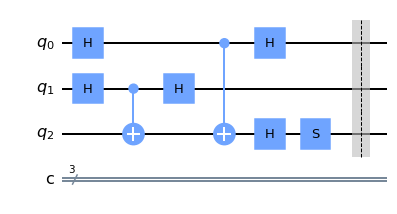

In [4]:

#create state 1/sqrt(2)*(|000>+i|111>)

q1 = QuantumRegister(3,'q')
c1 = ClassicalRegister(3,'c')
ghz = QuantumCircuit(q1, c1)
ghz.h(q1[0])
ghz.h(q1[1])
ghz.cx(q1[1],q1[2])
ghz.h(q1[1])
ghz.cx(q1[0],q1[2])
ghz.h(q1[0])
ghz.h(q1[2])
ghz.s(q1[2])
ghz.barrier()
ghz.draw(output='mpl')

/tmp/ipykernel_25773/3578120731.py:9: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  ghzYXX = ghz+measureYXX


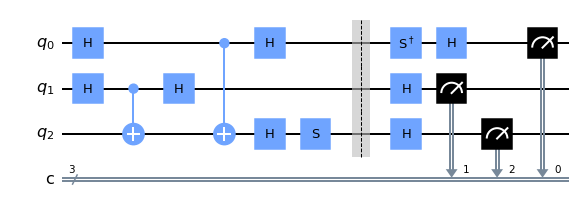

In [5]:
measureYXX = QuantumCircuit(q1, c1)
measureYXX.sdg(q1[0]).inverse()
measureYXX.h(q1[0])
measureYXX.h(q1[1])
measureYXX.h(q1[2])
measureYXX.measure(q1[0], c1[0])
measureYXX.measure(q1[1], c1[1])
measureYXX.measure(q1[2], c1[2])
ghzYXX = ghz+measureYXX
ghzYXX.draw(output='mpl')

/tmp/ipykernel_25773/877027769.py:9: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  ghzXYX = ghz+measureXYX


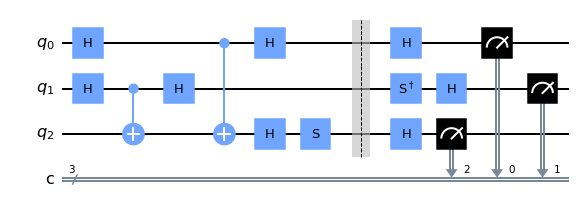

In [6]:
measureXYX = QuantumCircuit(q1, c1)
measureXYX.sdg(q1[1]).inverse()
measureXYX.h(q1[0])
measureXYX.h(q1[1])
measureXYX.h(q1[2])
measureXYX.measure(q1[0], c1[0])
measureXYX.measure(q1[1], c1[1])
measureXYX.measure(q1[2], c1[2])
ghzXYX = ghz+measureXYX
ghzXYX.draw(output='mpl')

/tmp/ipykernel_25773/2293330852.py:9: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  ghzXXY = ghz+measureXXY


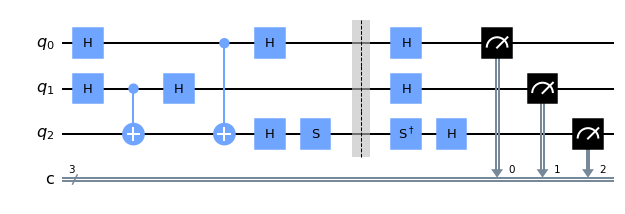

In [7]:
measureXXY = QuantumCircuit(q1, c1)
measureXXY.sdg(q1[2]).inverse()
measureXXY.h(q1[0])
measureXXY.h(q1[1])
measureXXY.h(q1[2])
measureXXY.measure(q1[0], c1[0])
measureXXY.measure(q1[1], c1[1])
measureXXY.measure(q1[2], c1[2])
ghzXXY = ghz+measureXXY
ghzXXY.draw(output='mpl')

/tmp/ipykernel_25773/439885152.py:11: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  ghzYYY = ghz+measureYYY


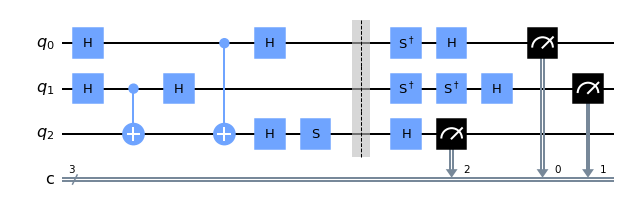

In [8]:
measureYYY = QuantumCircuit(q1, c1)
measureYYY.sdg(q1[0]).inverse()
measureYYY.sdg(q1[1]).inverse()
measureYYY.sdg(q1[1]).inverse()
measureYYY.h(q1[0])
measureYYY.h(q1[1])
measureYYY.h(q1[2])
measureYYY.measure(q1[0], c1[0])
measureYYY.measure(q1[1], c1[1])
measureYYY.measure(q1[2], c1[2])
ghzYYY = ghz+measureYYY
ghzYYY.draw(output='mpl')

In [9]:
circuits=[ghzYYY,ghzYXX,ghzXYX,ghzXXY]
shots=1024
transpiled_circuits = transpile(circuits, quito)
job_real = quito.run(transpiled_circuits, shots=shots)
job_monitor(job_real)
result_real = job_real.result()
counts = []
counts.append(result_real.get_counts(ghzYYY))
counts.append(result_real.get_counts(ghzYXX))
counts.append(result_real.get_counts(ghzXYX))
counts.append(result_real.get_counts(ghzXXY))
print(counts)

Job Status: job has successfully run
[{'000': 39, '001': 237, '010': 246, '011': 27, '100': 224, '101': 18, '110': 20, '111': 213}, {'000': 241, '001': 30, '010': 33, '011': 252, '100': 18, '101': 231, '110': 211, '111': 8}, {'000': 269, '001': 44, '010': 39, '011': 200, '100': 19, '101': 222, '110': 216, '111': 15}, {'000': 236, '001': 31, '010': 25, '011': 217, '100': 28, '101': 235, '110': 238, '111': 14}]


In [10]:
Exp=[]
for i in range(4):
    probs={}
    for output in ['000','001','010','011','100','101','110','111']:
        if output in counts[i]:
            probs[output] = counts[i][output]/shots
        else:
            probs[output] = 0
    print(probs)
    Exp.append(probs['000']-probs['001']-probs['010']+probs['011']-probs['100']+probs['101']+probs['110']-probs['111'])
print(Exp)
print(Exp[1]+Exp[2]+Exp[3]-Exp[0])

{'000': 0.0380859375, '001': 0.2314453125, '010': 0.240234375, '011': 0.0263671875, '100': 0.21875, '101': 0.017578125, '110': 0.01953125, '111': 0.2080078125}
{'000': 0.2353515625, '001': 0.029296875, '010': 0.0322265625, '011': 0.24609375, '100': 0.017578125, '101': 0.2255859375, '110': 0.2060546875, '111': 0.0078125}
{'000': 0.2626953125, '001': 0.04296875, '010': 0.0380859375, '011': 0.1953125, '100': 0.0185546875, '101': 0.216796875, '110': 0.2109375, '111': 0.0146484375}
{'000': 0.23046875, '001': 0.0302734375, '010': 0.0244140625, '011': 0.2119140625, '100': 0.02734375, '101': 0.2294921875, '110': 0.232421875, '111': 0.013671875}
[-0.796875, 0.826171875, 0.771484375, 0.80859375]
3.203125
